<a href="https://colab.research.google.com/github/Mahendhar-Saratha/CrimeCheck/blob/main/KDD_Project_Notebook.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

## 1. INTRODUCTION

------------------------

The Project aims to present predictive models on the likelihood of arrest in a crime incident using some key factors that would influence arrest outcomes based on historic crimes. The independent variables of interest are Primary Type representing the crime category, Location Description representing the setting where the crime is committed, and Year representing temporal trends in changes.

## 2. LIBRARY IMPORTS

------------------------

In [ ]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestClassifier
from sklearn.metrics import accuracy_score, classification_report
from sklearn.linear_model import LogisticRegression
from sklearn.svm import SVC
from sklearn.metrics import log_loss
from sklearn.metrics import confusion_matrix
import folium
from folium.plugins import HeatMap

#avoid warnings
import warnings
warnings.filterwarnings('ignore')

## 3. DATSET LOADING AND PROFILING

------------------------

In [ ]:
crime_data=pd.read_csv('/content/drive/MyDrive/KDD/Crimes_-_2001_to_Present_20241108.csv')

In [ ]:
crime_data.head()

,ID,Case Number,Date,Block,IUCR,Primary Type,Description,Location Description,Arrest,Domestic,...,Ward,Community Area,FBI Code,X Coordinate,Y Coordinate,Year,Updated On,Latitude,Longitude,Location
0,11037294,JA371270,03/18/2015 12:00:00 PM,0000X W WACKER DR,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,BANK,False,False,...,42.0,32.0,11,NaN,NaN,2015,08/01/2017 03:52:26 PM,NaN,NaN,NaN
1,11646293,JC213749,12/20/2018 03:00:00 PM,023XX N LOCKWOOD AVE,1154,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT $300 AND UNDER,APARTMENT,False,False,...,36.0,19.0,11,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
2,11645836,JC212333,05/01/2016 12:25:00 AM,055XX S ROCKWELL ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,NaN,False,False,...,15.0,63.0,11,NaN,NaN,2016,04/06/2019 04:04:43 PM,NaN,NaN,NaN
3,11645959,JC211511,12/20/2018 04:00:00 PM,045XX N ALBANY AVE,2820,OTHER OFFENSE,TELEPHONE THREAT,RESIDENCE,False,False,...,33.0,14.0,08A,NaN,NaN,2018,04/06/2019 04:04:43 PM,NaN,NaN,NaN
4,11645601,JC212935,06/01/2014 12:01:00 AM,087XX S SANGAMON ST,1153,DECEPTIVE PRACTICE,FINANCIAL IDENTITY THEFT OVER $ 300,RESIDENCE,False,False,...,21.0,71.0,11,NaN,NaN,2014,04/06/2019 04:04:43 PM,NaN,NaN,NaN


## 4. DATA PRE-PROCESSING

------------------------

In [ ]:
#Rows and columns in dataset
crime_data.shape

(8194489, 22)

In [ ]:
#Extracting top 100 records and saving to .csv
crime_data.head(100).to_csv('crime_data_head_100.csv', index=False)

No of Rows : **8194489**


No of Columns : **23**

Analysing Missing Values

In [ ]:
crime_data.isnull().sum()

,0
ID,0
Case Number,0
Date,0
Block,0
IUCR,0
Primary Type,0
Description,0
Location Description,13714
Arrest,0
Domestic,0


In [ ]:
#Filling missing values for missed columns
crime_data['Location'].fillna('Unknown', inplace=True)
crime_data['Location Description'].fillna('Unknown', inplace=True)
crime_data['District'].fillna(0, inplace=True)
crime_data['Community Area'].fillna(0, inplace=True)
crime_data['FBI Code'].fillna(0, inplace=True)
crime_data['X Coordinate'].fillna(0, inplace=True)
crime_data['Y Coordinate'].fillna(0, inplace=True)
crime_data['Latitude'].fillna(0, inplace=True)
crime_data['Longitude'].fillna(0, inplace=True)
crime_data['Community Area'].fillna(0, inplace=True)
crime_data['Ward'].fillna(0, inplace=True)



In [ ]:
crime_data.isnull().sum()

,0
ID,0
Case Number,0
Date,0
Block,0
IUCR,0
Primary Type,0
Description,0
Location Description,0
Arrest,0
Domestic,0


##5. EXPLORATORY DATA ANALYSIS

------------------------

Here, I will be doing deep dive into dataset to anlyse trends and insights and also multi variate data analysisso that it will be helpful to analyse our data againist our response variable

**5.1 Crime Type Distribution**

I will start by analyzing the "crime type" categorical variable for a better overview of the kind of crimes that occur allowing us to make informed conclusions in relation to our response variable.

In [ ]:
#Extarcting value count values to sort it in plotting
index_values=crime_data["Primary Type"].value_counts().index

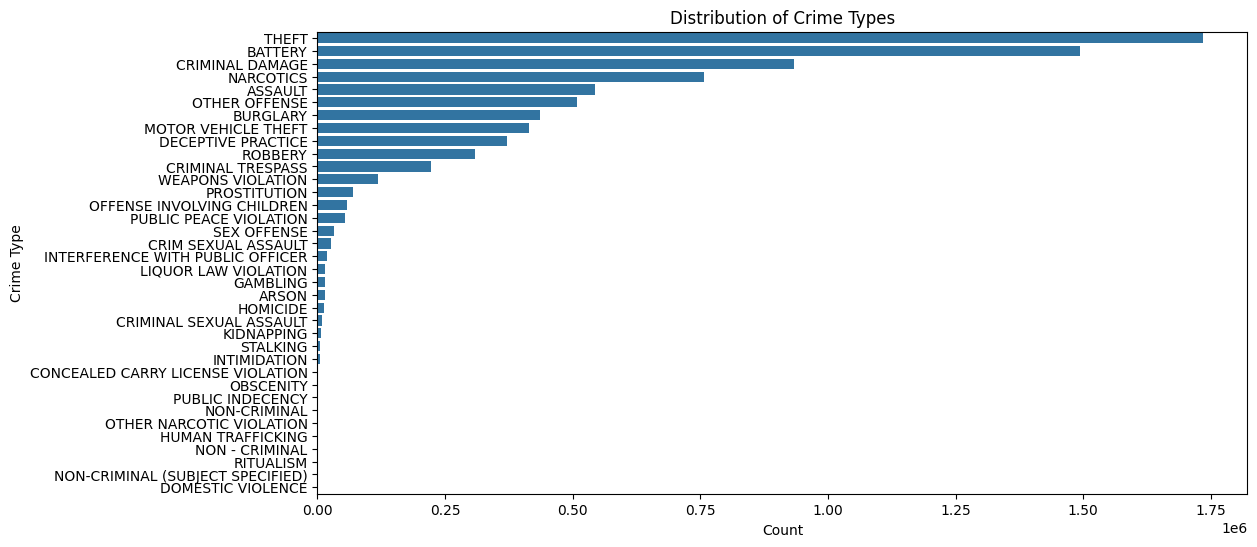

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(y="Primary Type", data=crime_data, order=index_values)
plt.title("Distribution of Crime Types")
plt.xlabel("Count")
plt.ylabel("Crime Type")
plt.show()


The chart shows that theft, battery, and criminal damage are the most common types of crimes. This may suggest that such areas could want priority in resources. Less frequent but serious crimes, such as homicide and human trafficking, might deserve specialized attention. This helps in the distribution of understanding crime trends and assists better in resource allocation.

**5.2 Arrests by Year**



This help us to analuze trend of arrest rates, which can say which period is having more or less effective enforcement. This helps to match any fluctuation in arrest outcomes with some external factors or changes in policy.

In [ ]:
arrest_counts_by_year = crime_data.groupby("Year")["Arrest"].sum()

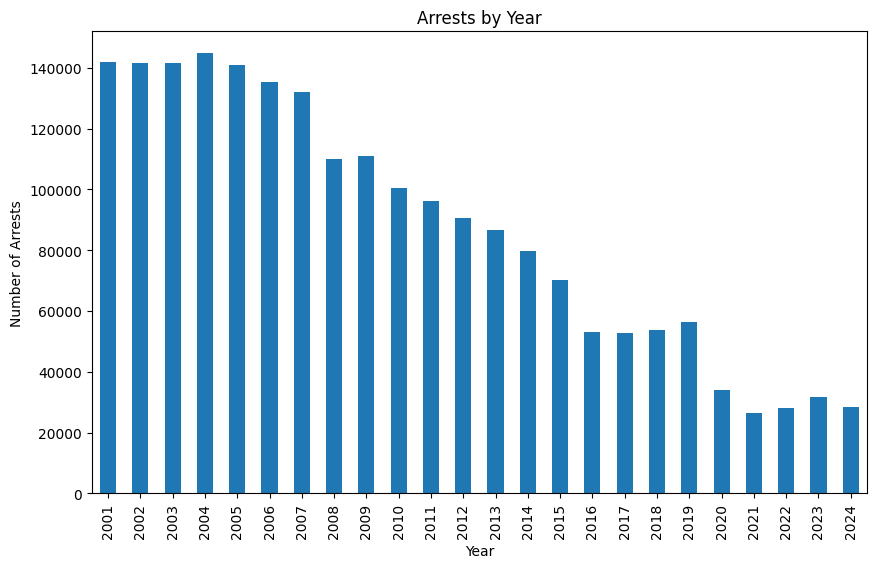

In [ ]:
plt.figure(figsize=(10, 6))
arrest_counts_by_year.plot(kind='bar')
plt.title("Arrests by Year")
plt.xlabel("Year")
plt.ylabel("Number of Arrests")
plt.show()

**5.3 Common Crime Locations**

Here we can analyze where crimes are common, determined from higher and lower arrest rates. This provides more insight into the effect of location on the likelihood of arrest and serves as the foundation of police focused activities.

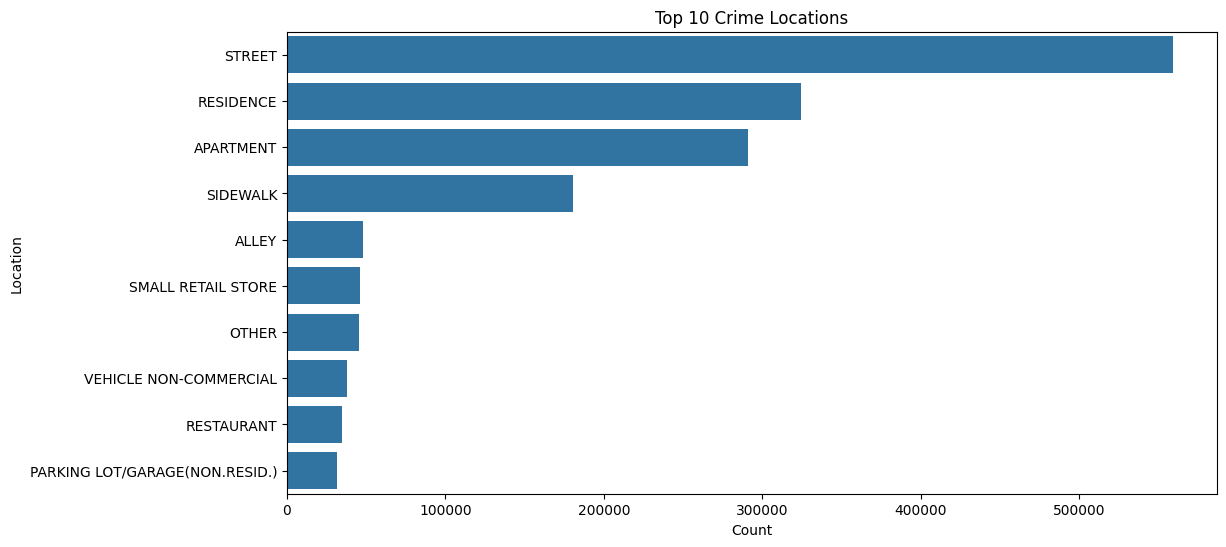

In [ ]:
plt.figure(figsize=(12, 6))
sns.countplot(y="Location Description", data=crime_data, order=crime_data["Location Description"].value_counts().index[:10])
plt.title("Top 10 Crime Locations")
plt.xlabel("Count")
plt.ylabel("Location")
plt.show()

**5.4 Seasonal Trends - Crimes by Month**



In [ ]:
crime_data['Date'] = pd.to_datetime(crime_data['Date'], errors='coerce')
crime_data['Month'] = crime_data['Date'].dt.month

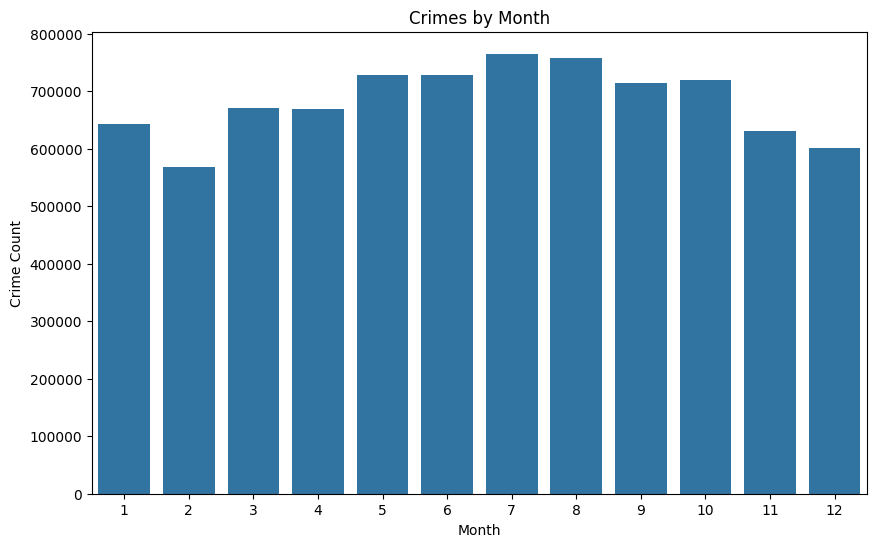

In [ ]:
plt.figure(figsize=(10, 6))
sns.countplot(x="Month", data=crime_data)
plt.title("Crimes by Month")
plt.xlabel("Month")
plt.ylabel("Crime Count")
plt.show()

**5.5 Summarize Arrest and Domestic incidents**

In [ ]:
arrest_domestic_summary = crime_data[['Arrest', 'Domestic']].value_counts().unstack()

<Figure size 800x600 with 0 Axes>

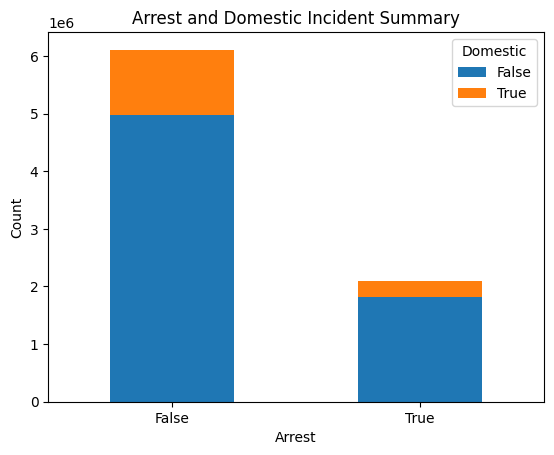

In [ ]:
# Arrest and Domestic incidents
plt.figure(figsize=(8, 6))
arrest_domestic_summary.plot(kind='bar', stacked=True)
plt.title("Arrest and Domestic Incident Summary")
plt.xlabel("Arrest")
plt.ylabel("Count")
plt.legend(title="Domestic")
plt.xticks(rotation=0)
plt.show()

**5.7 Yearly summary of incidents**

In [ ]:
yearly_summary = crime_data.groupby('Year').size()

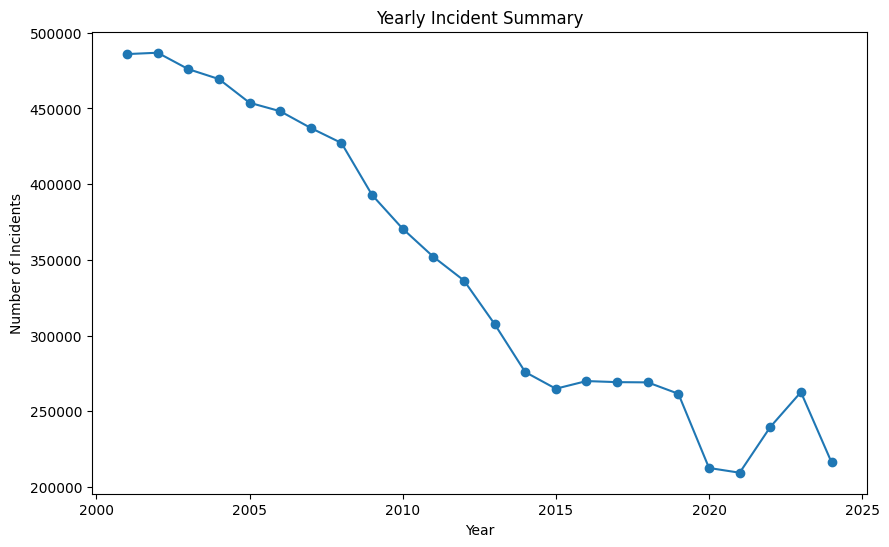

In [ ]:
# Yearly incidents
plt.figure(figsize=(10, 6))
yearly_summary.plot(kind='line', marker='o')
plt.title("Yearly Incident Summary")
plt.xlabel("Year")
plt.ylabel("Number of Incidents")
plt.show()


**5.8 Location and Crime Type Cross Summary**

In [ ]:
location_crime_summary = crime_data.groupby(['Location Description', 'Primary Type']).size().unstack().fillna(0).head(10)
location_crime_summary

Primary Type,ARSON,ASSAULT,BATTERY,BURGLARY,CONCEALED CARRY LICENSE VIOLATION,CRIM SEXUAL ASSAULT,CRIMINAL DAMAGE,CRIMINAL SEXUAL ASSAULT,CRIMINAL TRESPASS,DECEPTIVE PRACTICE,...,OTHER OFFENSE,PROSTITUTION,PUBLIC INDECENCY,PUBLIC PEACE VIOLATION,RITUALISM,ROBBERY,SEX OFFENSE,STALKING,THEFT,WEAPONS VIOLATION
Location Description,,,,,,,,,,,,,,,,,,,,,
ABANDONED BUILDING,250.0,88.0,418.0,1973.0,1.0,370.0,1139.0,49.0,1703.0,93.0,...,500.0,19.0,1.0,115.0,0.0,172.0,54.0,0.0,1591.0,249.0
AIRCRAFT,0.0,47.0,202.0,0.0,0.0,0.0,10.0,2.0,3.0,28.0,...,37.0,0.0,0.0,140.0,0.0,1.0,20.0,0.0,434.0,0.0
AIRPORT BUILDING NON-TERMINAL - NON-SECURE AREA,2.0,82.0,111.0,1.0,7.0,0.0,59.0,2.0,96.0,328.0,...,55.0,0.0,0.0,14.0,0.0,6.0,2.0,1.0,550.0,6.0
AIRPORT BUILDING NON-TERMINAL - SECURE AREA,0.0,32.0,63.0,0.0,41.0,1.0,23.0,0.0,9.0,42.0,...,63.0,0.0,0.0,12.0,0.0,0.0,3.0,1.0,559.0,8.0
AIRPORT EXTERIOR - NON-SECURE AREA,1.0,80.0,193.0,4.0,1.0,0.0,125.0,3.0,68.0,230.0,...,45.0,0.0,0.0,45.0,0.0,9.0,0.0,2.0,279.0,5.0
AIRPORT EXTERIOR - SECURE AREA,0.0,40.0,53.0,1.0,17.0,0.0,43.0,0.0,50.0,22.0,...,31.0,0.0,0.0,27.0,0.0,0.0,2.0,0.0,226.0,5.0
AIRPORT PARKING LOT,0.0,70.0,88.0,2.0,1.0,0.0,340.0,3.0,40.0,218.0,...,30.0,0.0,0.0,5.0,0.0,5.0,0.0,2.0,470.0,1.0
AIRPORT TERMINAL LOWER LEVEL - NON-SECURE AREA,1.0,133.0,255.0,4.0,1.0,0.0,54.0,1.0,1005.0,97.0,...,37.0,0.0,0.0,14.0,0.0,5.0,4.0,2.0,923.0,0.0
AIRPORT TERMINAL LOWER LEVEL - SECURE AREA,0.0,31.0,74.0,1.0,12.0,0.0,24.0,0.0,29.0,37.0,...,64.0,0.0,0.0,5.0,0.0,0.0,4.0,0.0,774.0,5.0


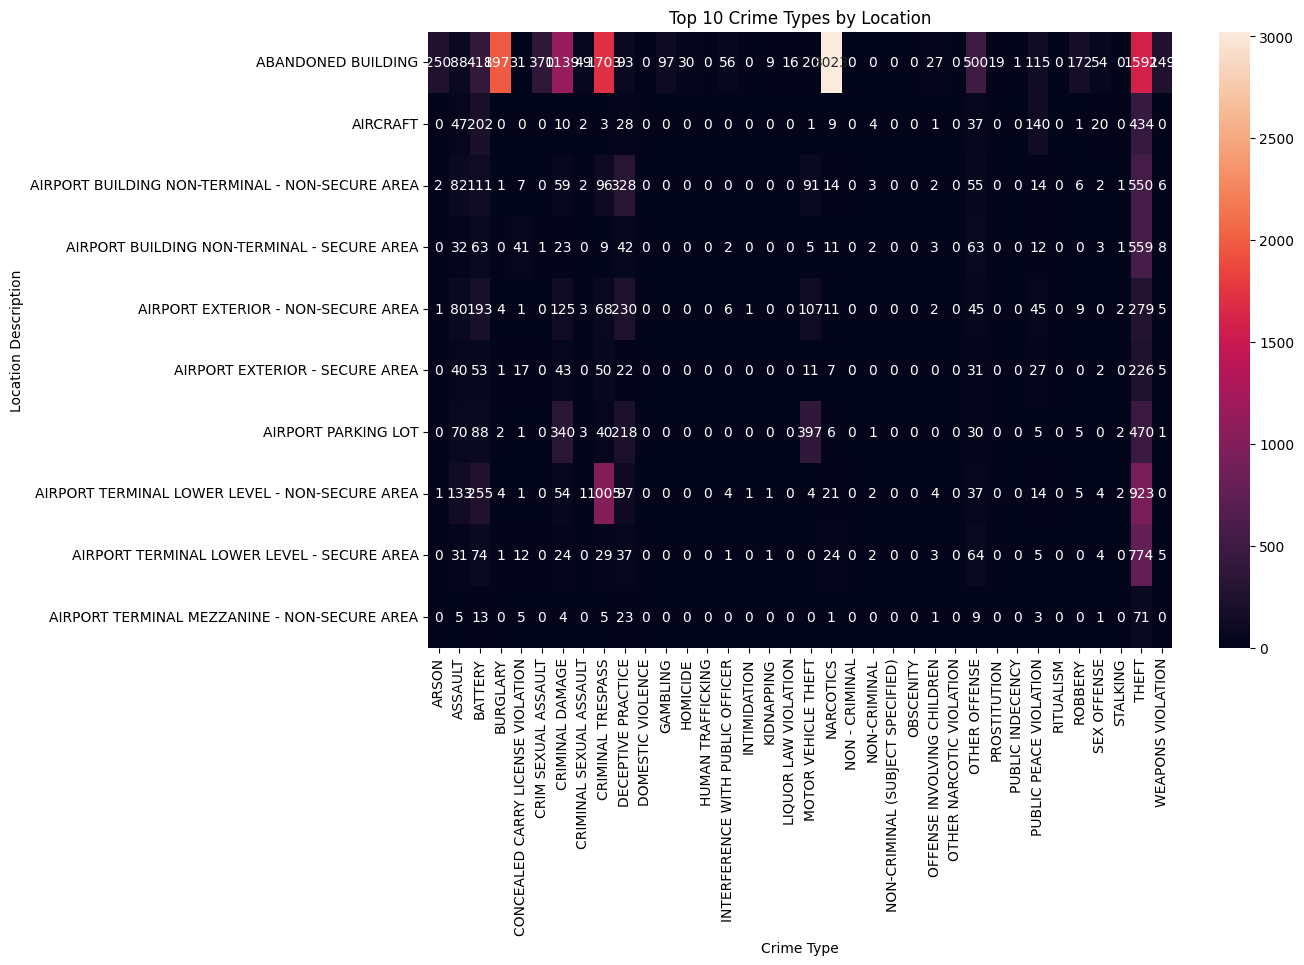

In [ ]:
# Cross Summary of Location and Crime Type (Top 10)
plt.figure(figsize=(12, 8))
sns.heatmap(location_crime_summary, annot=True, fmt="1.0f")
plt.title("Top 10 Crime Types by Location")
plt.xlabel("Crime Type")
plt.ylabel("Location Description")
plt.show()

**5.9 Arson crime type arrested areas - 2018**


In [ ]:
#Arson crime type arrested areas - 2018
arrest_data=crime_data[(crime_data['Primary Type'] == 'ARSON') & (crime_data['Arrest'] == True) & (crime_data['Year'] == 2018)]

In [ ]:
# Create a base map centered around the mean coordinates of arrest data
mean_lat_arrest = arrest_data['Latitude'].mean()
mean_lon_arrest = arrest_data['Longitude'].mean()
arrest_map = folium.Map(location=[mean_lat_arrest, mean_lon_arrest], zoom_start=12)

# Add a heatmap layer to the map
heat_data = arrest_data[['Latitude', 'Longitude']].values.tolist()
HeatMap(heat_data).add_to(arrest_map)


# Display the map
arrest_map

Highlighted hotspot areas for Arson Arrest Types, shows most of the hotspots around middle of the city.

##6. MODEL BUILDING

--------

**6.1 Logistic Regression**

In [ ]:
selected_features_basic = ['Primary Type', 'Location Description', 'Year']
X = crime_data[selected_features_basic]
y = crime_data['Arrest'].astype(int)

In [ ]:
for column in selected_features_basic:
    le = LabelEncoder()
    X[column] = le.fit_transform(X[column])


In [ ]:
X

,Primary Type,Location Description,Year
0,9,23,14
1,9,17,17
2,9,199,15
3,26,161,17
4,9,161,13
...,...,...,...
8194484,3,17,19
8194485,34,161,19
8194486,2,17,19
8194487,18,190,19


In [ ]:
y.head()

,Arrest
0,0
1,0
2,0
3,0
4,0


In [ ]:
# Split the data
X_train_basic, X_test_basic, y_train_basic, y_test_basic = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
log_reg_train_loss = []
log_reg_val_loss = []

In [ ]:
# Train Logistic Regression model with the simplified feature set
for i in range(1, 5):
    logistic_model = LogisticRegression(
        max_iter=i, class_weight='balanced', random_state=42
    )

    logistic_model.fit(X_train_basic, y_train_basic)

    train_probs = logistic_model.predict_proba(X_train_basic)
    val_probs = logistic_model.predict_proba(X_test_basic)

    # Calculate log loss
    train_loss = log_loss(y_train_basic, train_probs)
    val_loss = log_loss(y_test_basic, val_probs)

    log_reg_train_loss.append(train_loss)
    log_reg_val_loss.append(val_loss)

    if i % 100 == 0:
        print(f"Iteration {i}: Train Loss = {train_loss:.4f}, Validation Loss = {val_loss:.4f}")

# Final output
print("Training and Validation Loss calculation completed!")


Training and Validation Loss calculation completed!


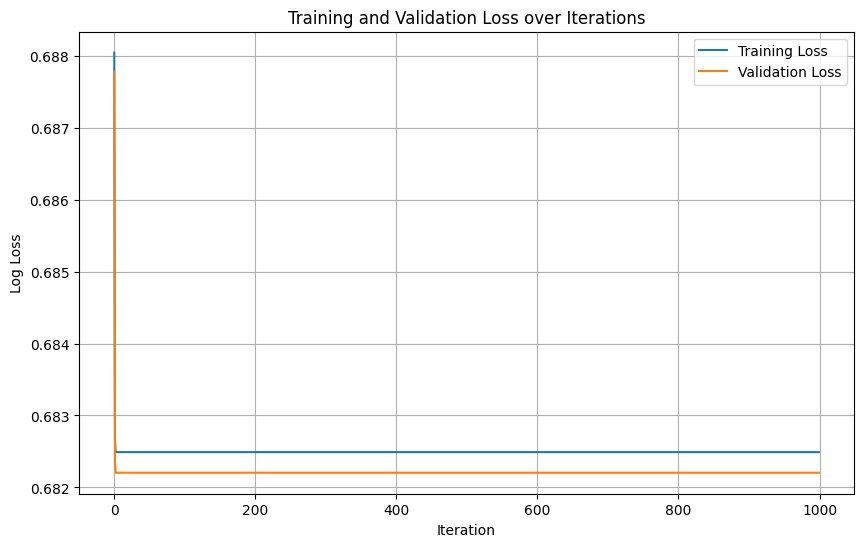

In [ ]:
#Plotting log_reg_train_loss and log_reg_test_loss smooth curve

plt.figure(figsize=(10, 6))
plt.plot(log_reg_train_loss, label='Training Loss')
plt.plot(log_reg_val_loss, label='Validation Loss')
plt.xlabel('Iteration')
plt.ylabel('Log Loss')
plt.title('Training and Validation Loss over Iterations')
plt.legend()
plt.grid(True)
plt.show()

In [ ]:
# Make predictions from above model and evaluate
y_pred_basic = logistic_model.predict(X_test_basic)
accuracy = accuracy_score(y_test_basic, y_pred_basic)
report = classification_report(y_test_basic, y_pred_basic)

accuracy, report



(0.5293402436677979,
 '              precision    recall  f1-score   support\n\n           0       0.79      0.50      0.61   1832453\n           1       0.30      0.62      0.40    625894\n\n    accuracy                           0.53   2458347\n   macro avg       0.55      0.56      0.51   2458347\nweighted avg       0.67      0.53      0.56   2458347\n')

Text(70.72222222222221, 0.5, 'True Labels')

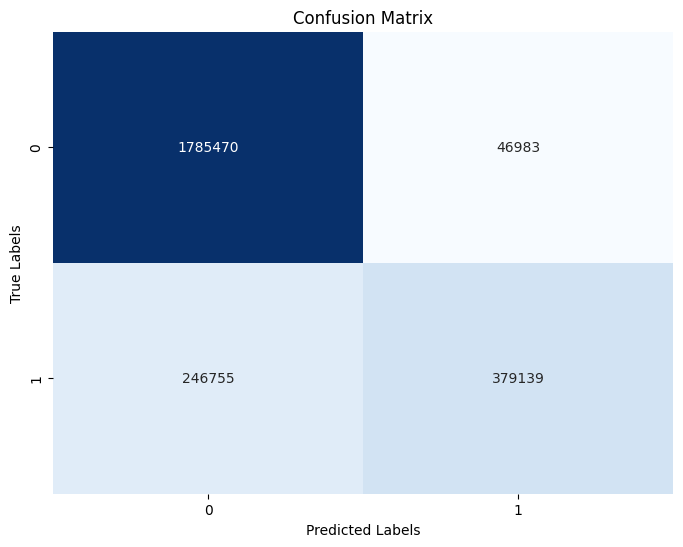

In [ ]:
#confusion matrix plotting
conf_matrix = confusion_matrix(y_test, y_pred)
conf_matrix

#Plotting
plt.figure(figsize=(8, 6))
sns.heatmap(conf_matrix, annot=True, fmt='d', cmap='Blues', cbar=False)
plt.title('Confusion Matrix')
plt.xlabel('Predicted Labels')
plt.ylabel('True Labels')

**6.2 Random Forest Classifier**

In [ ]:
# Re-split the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [ ]:
# Re-train the model
model = RandomForestClassifier(random_state=42)
model.fit(X_train_basic, y_train_basic)

RandomForestClassifier(random_state=42)

In [ ]:
#Doing same like Logistic regression for n_estimators in Rnadom Forest
rf_train_loss = []
rf_val_loss = []

In [ ]:
for i in range(1, 51):
    model = RandomForestClassifier(n_estimators=i, random_state=42)
    model.fit(X_train_basic, y_train_basic)
    rf_train_loss.append(log_loss(y_train_basic, model.predict_proba(X_train_basic)))
    rf_val_loss.append(log_loss(y_test_basic, model.predict_proba(X_test_basic)))
    print(f"Iteration {i}: Train Loss = {rf_train_loss[-1]:.4f}, Validation Loss = {rf_val_loss[-1]:.4f}")

Iteration 1: Train Loss = 0.3263, Validation Loss = 0.3690
Iteration 2: Train Loss = 0.3091, Validation Loss = 0.3453
Iteration 3: Train Loss = 0.3053, Validation Loss = 0.3380
Iteration 4: Train Loss = 0.3041, Validation Loss = 0.3350
Iteration 5: Train Loss = 0.3037, Validation Loss = 0.3333
Iteration 6: Train Loss = 0.3035, Validation Loss = 0.3322
Iteration 7: Train Loss = 0.3034, Validation Loss = 0.3312
Iteration 8: Train Loss = 0.3034, Validation Loss = 0.3304
Iteration 9: Train Loss = 0.3034, Validation Loss = 0.3299
Iteration 10: Train Loss = 0.3033, Validation Loss = 0.3295
Iteration 11: Train Loss = 0.3033, Validation Loss = 0.3290
Iteration 12: Train Loss = 0.3033, Validation Loss = 0.3285
Iteration 13: Train Loss = 0.3033, Validation Loss = 0.3282
Iteration 14: Train Loss = 0.3033, Validation Loss = 0.3280
Iteration 15: Train Loss = 0.3033, Validation Loss = 0.3278
Iteration 16: Train Loss = 0.3033, Validation Loss = 0.3275
Iteration 17: Train Loss = 0.3032, Validation Los

In [ ]:
# Make predictions
y_pred = model.predict(X_test_basic)

In [ ]:
# Evaluate model performance
accuracy = accuracy_score(y_test_basic, y_pred)
report = classification_report(y_test_basic, y_pred)

accuracy, report

(0.8805140201932437,
 '              precision    recall  f1-score   support\n\n           0       0.88      0.97      0.92   1832453\n           1       0.89      0.61      0.72    625894\n\n    accuracy                           0.88   2458347\n   macro avg       0.88      0.79      0.82   2458347\nweighted avg       0.88      0.88      0.87   2458347\n')

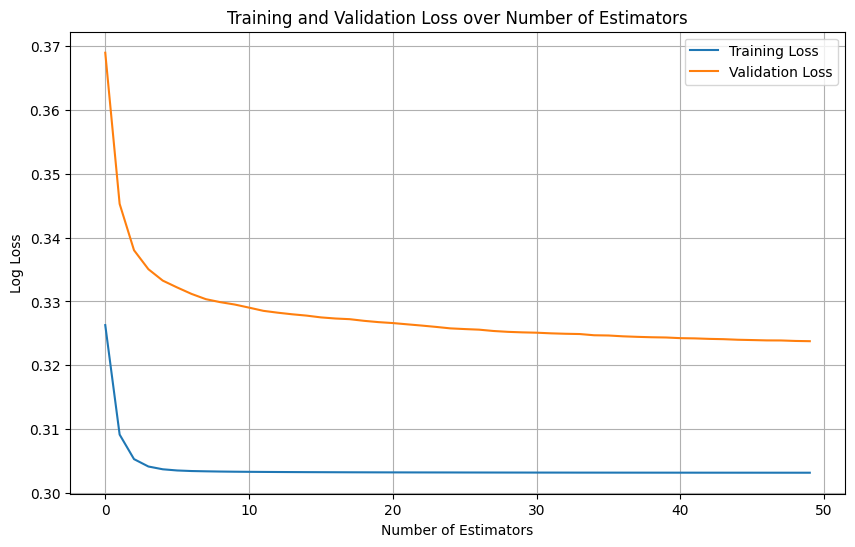

In [ ]:
#Plotting
plt.figure(figsize=(10, 6))
plt.plot(rf_train_loss, label='Training Loss')
plt.plot(rf_val_loss, label='Validation Loss')
plt.xlabel('Number of Estimators')
plt.ylabel('Log Loss')
plt.title('Training and Validation Loss over Number of Estimators')
plt.legend()
plt.grid(True)
plt.show()

**6.3 Support Vector Machine**

In [ ]:
# Fitting an SVM model
svm_model = SVC(kernel='linear', random_state=42)
svm_model.fit(X_train_basic, y_train_basic)

In [ ]:
# Making predictions and evaluating the model
y_pred = svm_model.predict(X_test_basic)
report = classification_report(y_test_basic, y_pred_basic, target_names=['No Arrest', 'Arrest'])


## 7. HYPER PARAMETER TUNING AND MODEL IMPROVEMENTS

Here we will be trying out some regularization techniques like Lasso and Ridge

Regularization with Logistic regression

In [ ]:
model2 = LogisticRegression(penalty='l1', C=1.0, solver='liblinear')
model2.fit(X_train_basic, y_train_basic)

LogisticRegression(penalty='l1', solver='liblinear')

In [ ]:
# Make predictions from above model and evaluate
y_pred_basic = model2.predict(X_test_basic)
accuracy = accuracy_score(y_test_basic, y_pred_basic)
report = classification_report(y_test_basic, y_pred_basic)

accuracy, report


(0.7454004662482554,
 '              precision    recall  f1-score   support\n\n           0       0.75      1.00      0.85   1832453\n           1       0.00      0.00      0.00    625894\n\n    accuracy                           0.75   2458347\n   macro avg       0.37      0.50      0.43   2458347\nweighted avg       0.56      0.75      0.64   2458347\n')

Regularization with Random Forest

In [ ]:
#Regularization with Random Forest
model3 = RandomForestClassifier(n_estimators=100, max_depth=10, min_samples_split=2, min_samples_leaf=1, random_state=42)
model3.fit(X_train_basic, y_train_basic)

RandomForestClassifier(max_depth=10, random_state=42)

In [ ]:
y_pred_basic = model3.predict(X_test_basic)
accuracy = accuracy_score(y_test_basic, y_pred_basic)
report = classification_report(y_test_basic, y_pred_basic)

accuracy, report

(0.8701704844759507,
 '              precision    recall  f1-score   support\n\n           0       0.86      0.98      0.92   1832453\n           1       0.90      0.55      0.68    625894\n\n    accuracy                           0.87   2458347\n   macro avg       0.88      0.77      0.80   2458347\nweighted avg       0.87      0.87      0.86   2458347\n')

Neural Network implementation (We did it in Seperate Document)

## 8. CONCLUSION

------------------------

The project inspects the predictive power of key features: Primary Type, Location Description, Year, for determining the probability of the Arrest and No Arrest outcomes in crime incidents.

Logistic Regression posted a moderate accuracy of 53%, with high precision for No Arrest but really poor for Arrest, accompanied by low F1-scores and precision. In contrast, it had the best recall for Arrest, though with a lot of misclassifications.

Random Forest showed considerable improvement and reached an accuracy of 88% with balanced precision, recall, and F1-scores for both Arrest and No Arrest. However, slightly lower recall for Arrest (0.61) suggests occasional missed cases.

The analysis explains Random Forest and strength of machine learning models to uncover nonlinear associations. Knowledge gained from the best insights of this present analysis

In the Next Notebook we will cover the Neural Network Model to understand different metrics for Arrest and No Arrest by including two new spatial features from the dataset.